# Data clening and understanding (EDA)

In [945]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [946]:
# read data into panda dataframe
df=pd.read_csv('full_gen_data - full_gen_data.csv')
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [947]:
# check for null values
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [948]:
df.shape

(100000, 24)

In [949]:
df['country'].unique()

array(['Germany', 'Austria', 'France'], dtype=object)

In [950]:
df['article'].nunique()

477

In [951]:
df['article.1'].nunique()

10

In [952]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [953]:
df['retailweek'].unique()

array(['2016-03-27', '2015-01-25', '2017-01-29', '2017-02-26',
       '2016-12-25', '2017-02-12', '2017-03-19', '2015-02-08',
       '2016-12-11', '2017-01-01', '2015-06-28', '2016-07-10',
       '2016-06-26', '2016-08-21', '2017-02-05', '2015-04-12',
       '2017-04-30', '2015-10-25', '2016-03-20', '2016-10-16',
       '2016-11-13', '2015-04-19', '2015-12-13', '2015-02-15',
       '2016-08-07', '2016-10-23', '2016-11-20', '2015-10-18',
       '2015-09-27', '2015-11-29', '2016-10-09', '2017-04-23',
       '2015-11-22', '2016-01-17', '2015-03-15', '2016-10-02',
       '2017-04-09', '2015-11-08', '2016-06-12', '2015-01-04',
       '2016-09-18', '2015-08-23', '2015-05-24', '2017-03-12',
       '2016-02-14', '2016-01-24', '2015-01-11', '2015-06-14',
       '2016-09-04', '2015-12-06', '2016-12-18', '2016-03-06',
       '2016-04-24', '2015-03-08', '2017-03-05', '2015-09-20',
       '2015-04-05', '2016-05-08', '2016-01-10', '2015-10-11',
       '2015-03-22', '2016-07-24', '2016-06-05', '2015-

In [954]:
df['retailweek'].nunique()

123

In [955]:
## the duration in which the data collected is from 4/1/2015 to 30/4/2017

In [956]:
# check fro duplicates
df.duplicated().sum()

0

In [957]:
df.dtypes

country            object
article            object
sales               int64
regular_price     float64
current_price     float64
ratio             float64
retailweek         object
promo1              int64
promo2              int64
customer_id       float64
article.1          object
productgroup       object
category           object
cost              float64
style              object
sizes              object
gender             object
rgb_r_main_col      int64
rgb_g_main_col      int64
rgb_b_main_col      int64
rgb_r_sec_col       int64
rgb_g_sec_col       int64
rgb_b_sec_col       int64
label               int64
dtype: object

In [958]:
# change retail week to datetime type
df['retailweek'] = pd.to_datetime(df['retailweek'])

In [959]:
# since the discount percentage is 1 - ratio we can enginner the feature discount from ration
df['discount'] = 1-df['ratio']

In [960]:
# enginner feature revenue from sales and price features
df['revenue'] = (df['sales'] * df['current_price'])

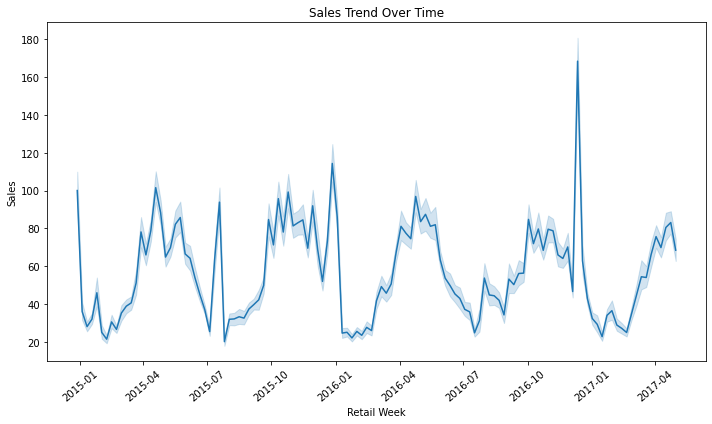

In [961]:
# sales trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='retailweek', y='sales', data=df)
plt.title('Sales Trend Over Time')
plt.xlabel('Retail Week')
plt.ylabel('Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

#### the sales changes over time but we can observe from the graph that sales increasing from march to may in every year
#### and then starts to decreases until august....
#### and then increasing from august to decembre and then starts to decrease until may comes again

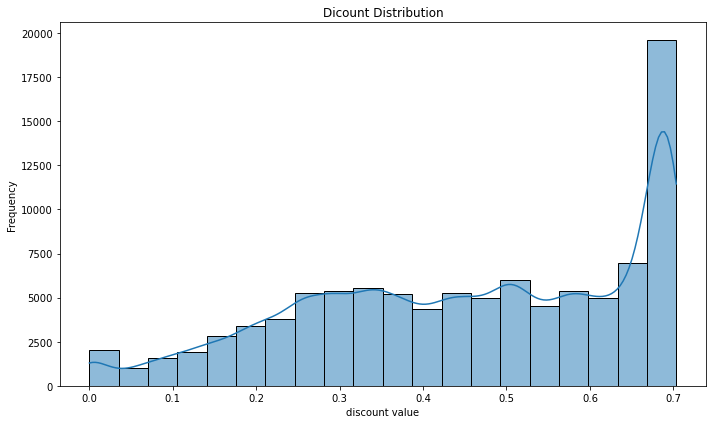

In [962]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], bins=20, kde=True)
plt.title('Dicount Distribution')
plt.xlabel('discount value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### the most frequent applied discount is 70 % 

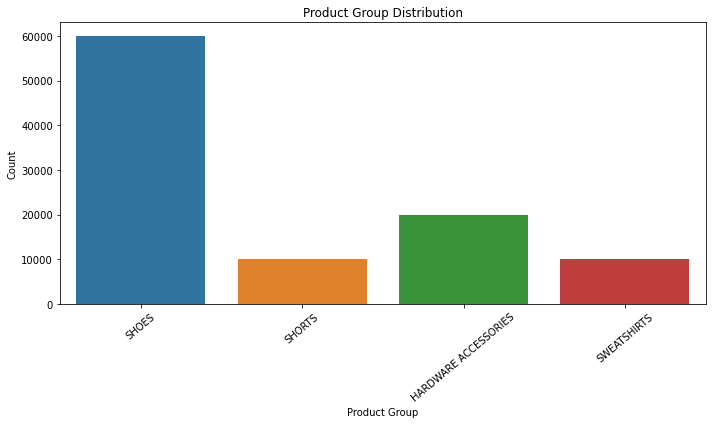

In [963]:
# plotting product group distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='productgroup', data=df)
plt.title('Product Group Distribution')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

#### seems that shoes is the primary product for our sport wear grouo

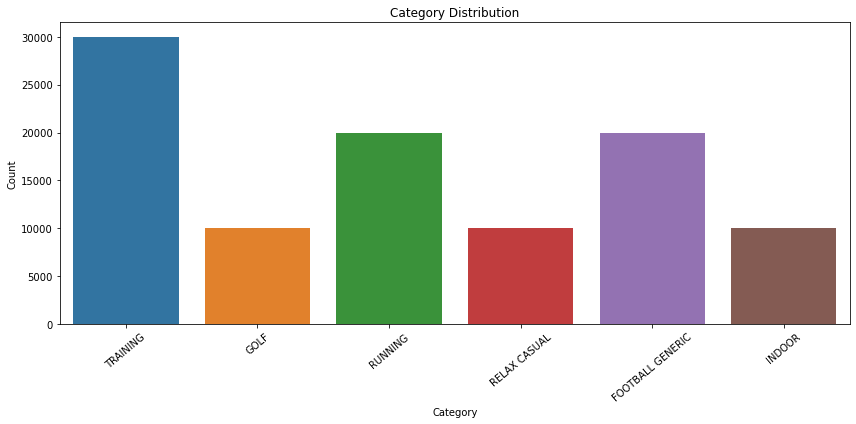

In [964]:
# ploting category ditribution
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

#### training , running and football products are the most

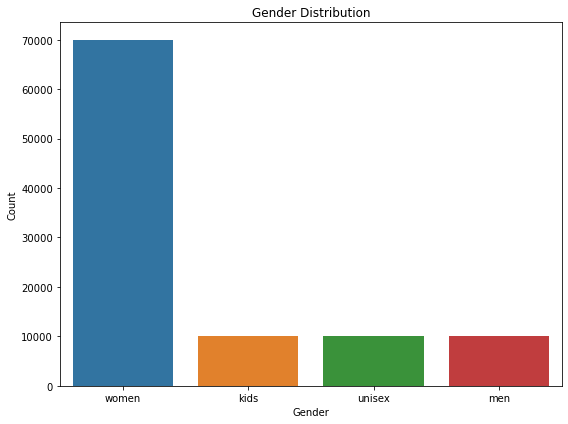

In [965]:
# plotting gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### seem that the primary target consumer is womens with 70 % of our data set

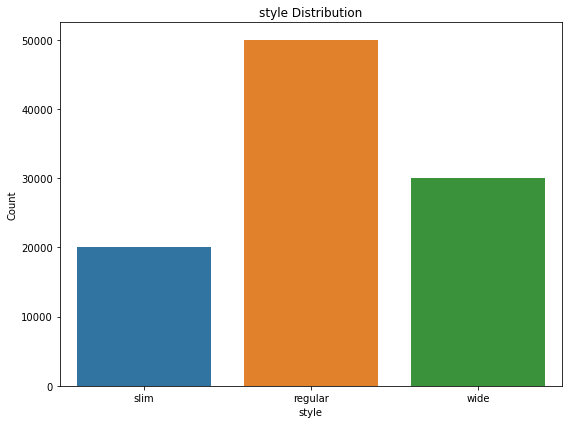

In [966]:
# plotting gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='style', data=df)
plt.title('style Distribution')
plt.xlabel('style')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### regular is more than slim and wide styles

<AxesSubplot:>

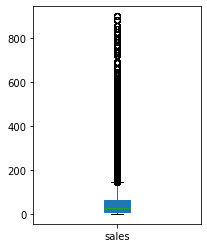

In [967]:
#ploting sales distribution
df['sales'].plot(kind='box', figsize=(3,4), patch_artist=True)

#### the most sales is between 20 and 100 units 

In [968]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    temp_1['did not buy'] = df[df['label'] == 0][column].value_counts()
    temp_1['buy'] = df[df['label'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('product count')
    plt.title('Distribution of {} and the label'.format(column))
    plt.show();

In [969]:
### plotting categorical values relation with the label

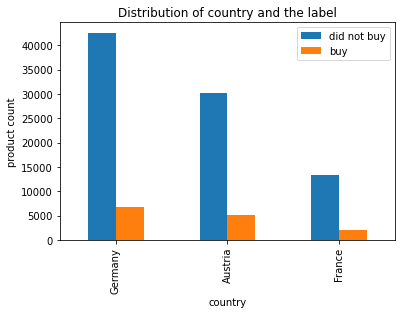

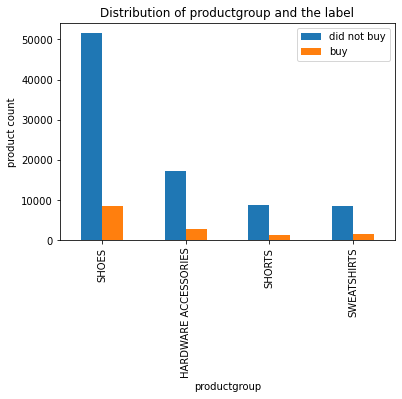

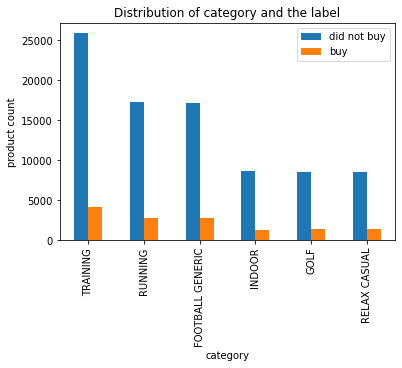

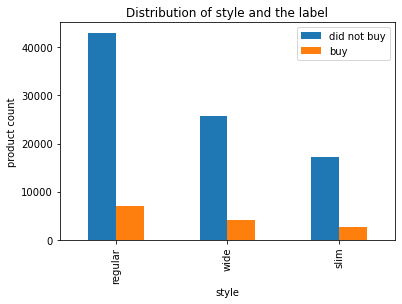

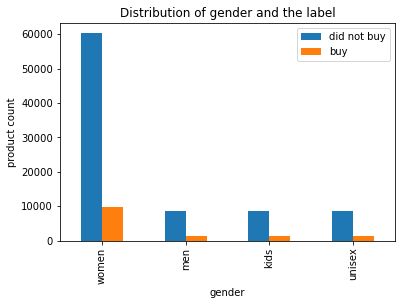

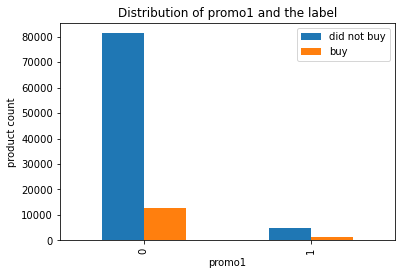

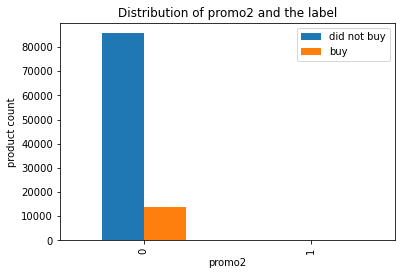

(None, None, None, None, None, None, None)

In [970]:
plot_bar('country'), plot_bar('productgroup'), plot_bar('category'), plot_bar('style'), plot_bar('gender'),plot_bar('promo1'), plot_bar('promo2')

#### the marketing campaign is germany most foucused but the convergence of customer is the same for all contries
#### promotion effect is not clear in the graph lets show promos effect in another way

In [971]:
# Calculate conversion rate during promotional weeks
conversion_rate_promo = df[df['promo1'] == 1]['label'].mean()

# Calculate conversion rate during non-promotional weeks
conversion_rate_non_promo = df[df['promo1'] == 0]['label'].mean()

# Calculate impact on conversion rate as a percentage
impact_on_conversion = ((conversion_rate_promo - conversion_rate_non_promo) / conversion_rate_non_promo) * 100

print(f"Promotion 1 Impact on Conversion Rate: {impact_on_conversion:.2f}%")

Promotion 1 Impact on Conversion Rate: 68.95%


In [972]:
# Calculate conversion rate during promotional weeks
conversion_rate_promo = df[df['promo2'] == 1]['label'].mean()

# Calculate conversion rate during non-promotional weeks
conversion_rate_non_promo = df[df['promo2'] == 0]['label'].mean()

# Calculate impact on conversion rate as a percentage
impact_on_conversion = ((conversion_rate_promo - conversion_rate_non_promo) / conversion_rate_non_promo) * 100

print(f"Promotion 1 Impact on Conversion Rate: {impact_on_conversion:.2f}%")

Promotion 1 Impact on Conversion Rate: 72.04%


#### promotion 1 and 2 has a huge effect on the customer convergence  

#### lets show promotions effect on sales

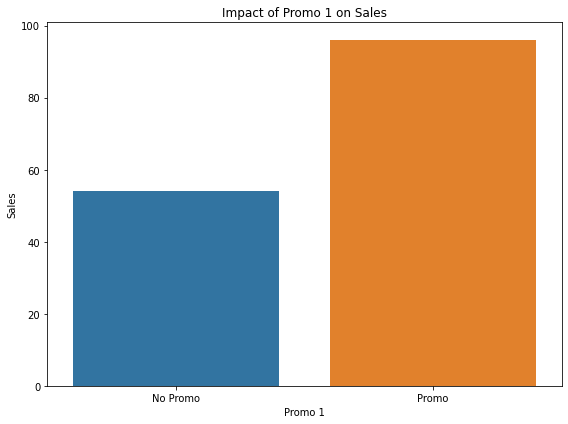

In [973]:
plt.figure(figsize=(8, 6))
sns.barplot(x='promo1', y='sales', data=df, ci=None)
plt.title('Impact of Promo 1 on Sales')
plt.xlabel('Promo 1')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.tight_layout()
plt.show()

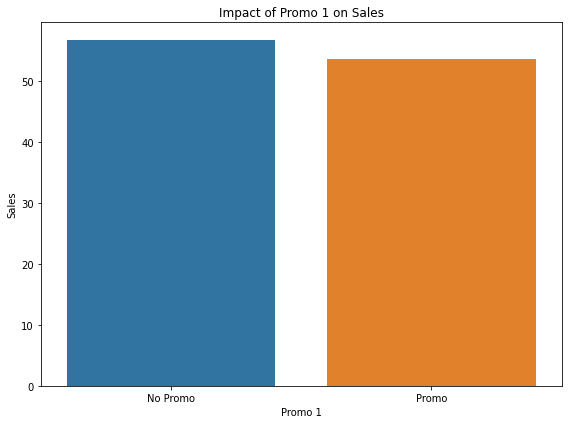

In [974]:
plt.figure(figsize=(8, 6))
sns.barplot(x='promo2', y='sales', data=df, ci=None)
plt.title('Impact of Promo 1 on Sales')
plt.xlabel('Promo 1')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.tight_layout()
plt.show()

In [975]:
# Calculate average sales during promotional weeks
avg_sales_promo = df[df['promo1'] == 1]['sales'].mean()

# Calculate average sales during non-promotional weeks
avg_sales_non_promo = df[df['promo1'] == 0]['sales'].mean()

# Calculate impact on sales as a percentage
impact_on_sales = ((avg_sales_promo - avg_sales_non_promo) / avg_sales_non_promo) * 100

print(f"Promotion 1 Impact on Sales: {impact_on_sales:.2f}%")

Promotion 1 Impact on Sales: 77.33%


In [976]:
# Calculate average sales during promotional weeks
avg_sales_promo = df[df['promo2'] == 1]['sales'].mean()

# Calculate average sales during non-promotional weeks
avg_sales_non_promo = df[df['promo2'] == 0]['sales'].mean()

# Calculate impact on sales as a percentage
impact_on_sales = ((avg_sales_promo - avg_sales_non_promo) / avg_sales_non_promo) * 100

print(f"Promotion 1 Impact on Sales: {impact_on_sales:.2f}%")

Promotion 1 Impact on Sales: -5.50%


#### seems that promotion 1 has hight impact also on sales but promotion 2 decrases the sales by 5 % 
#### this is because promo 2 represent store events whis could increase the customer attraction but without noticed effectt on sales
#### ( customers may attracted but may buy a small quantity of units )

In [977]:
### check for outliers

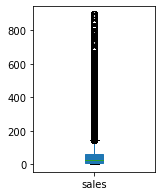

In [978]:
df['sales'].plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
    

current_price    AxesSubplot(0.125,0.71587;0.168478x0.16413)
dtype: object

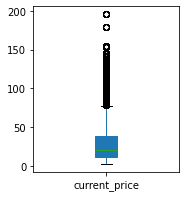

In [979]:
df['current_price'].plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)


ratio    AxesSubplot(0.125,0.71587;0.168478x0.16413)
dtype: object

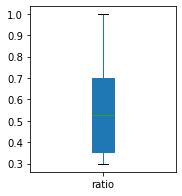

In [980]:
df['ratio'].plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)


discount    AxesSubplot(0.125,0.71587;0.168478x0.16413)
dtype: object

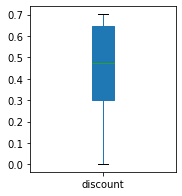

In [981]:
df['discount'].plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)


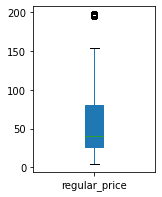

In [982]:
df['regular_price'].plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

#### we can consider the value above 160 is outliers 

In [983]:
# summation of the outlier
df[df['regular_price'] > 160].value_counts().sum()

280

In [984]:
#drop the outliers as they only 280 row
indices_to_drop = df[df['regular_price'] > 160].index
df.drop(indices_to_drop, inplace=True)

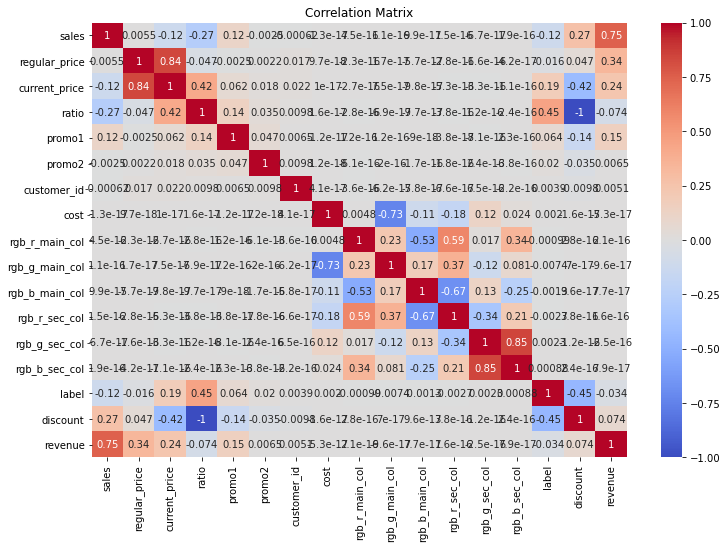

In [985]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.show()

#### revenue and sales is highly correlated 
#### ration and revenue are the same impact so we can remove one of them
#### blue and green secondary are highly correlated so we can remove one of them 
#### green main highly corr with the cost we can remove one of them 


# Data Preprocessing 

In [986]:
# drop unneeded features for sufficeint training
df.drop(columns =['article','article.1','customer_id'],inplace=True)


In [987]:
# drop highly correlated features
df.drop(columns =['ratio','rgb_g_sec_col','rgb_g_main_col','regular_price'],inplace=True)

In [988]:
df.columns

Index(['country', 'sales', 'current_price', 'retailweek', 'promo1', 'promo2',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_b_sec_col',
       'label', 'discount', 'revenue'],
      dtype='object')

In [989]:
# label encoding for sizes and style as they are ordinal features 
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['style']=label.fit_transform(df['style'])
        
df['style'].unique()   

array([1, 0, 2])

In [991]:
df['sizes'].unique()

array(['xxs,xs,s,m,l,xl,xxl', 'xs,s,m,l,xl'], dtype=object)

### I excpected that i will have many compinations of sizes so i was thinking to split thim in many columns but i found that sizes have only two unique value so i will encode it directly but using one hot encoding instead

In [992]:
# one hot encoding for the nominal categorical features we have

df = pd.get_dummies(df, columns = ['country', 'productgroup', 'category','sizes','gender'])
df

,sales,current_price,retailweek,promo1,promo2,cost,style,rgb_r_main_col,rgb_b_main_col,rgb_r_sec_col,...,category_INDOOR,category_RELAX CASUAL,category_RUNNING,category_TRAINING,"sizes_xs,s,m,l,xl","sizes_xxs,xs,s,m,l,xl,xxl",gender_kids,gender_men,gender_unisex,gender_women
0,28,3.95,2016-03-27,0,0,13.29,1,205,57,255,...,0,0,0,1,0,1,0,0,0,1
1,28,3.95,2016-03-27,0,0,2.29,0,188,104,255,...,0,0,0,1,0,1,0,0,0,1
2,28,3.95,2016-03-27,0,0,1.70,0,205,0,255,...,0,0,0,0,0,1,0,0,0,1
3,28,3.95,2016-03-27,0,0,9.00,0,205,149,164,...,0,0,1,0,0,1,1,0,0,0
4,28,3.95,2016-03-27,0,0,9.60,0,138,226,164,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,26.95,2016-06-26,0,0,4.20,2,79,205,164,...,0,0,0,1,0,1,0,0,0,1
99996,227,26.95,2016-06-26,0,0,9.90,2,139,26,205,...,0,0,0,0,1,0,0,0,1,0
99997,227,26.95,2016-06-26,0,0,5.20,2,135,250,205,...,1,0,0,0,0,1,0,0,0,1
99998,227,26.95,2016-06-26,0,0,1.29,1,181,181,205,...,0,0,1,0,0,1,0,0,0,1


In [993]:
# split retailweek into 3 columns 

In [994]:
df['year'] = df['retailweek'].dt.year
df['month'] = df['retailweek'].dt.month
df['day'] = df['retailweek'].dt.day


In [995]:
df.drop(columns=['retailweek'], inplace=True)
df

,sales,current_price,promo1,promo2,cost,style,rgb_r_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_b_sec_col,...,category_TRAINING,"sizes_xs,s,m,l,xl","sizes_xxs,xs,s,m,l,xl,xxl",gender_kids,gender_men,gender_unisex,gender_women,year,month,day
0,28,3.95,0,0,13.29,1,205,57,255,255,...,1,0,1,0,0,0,1,2016,3,27
1,28,3.95,0,0,2.29,0,188,104,255,255,...,1,0,1,0,0,0,1,2016,3,27
2,28,3.95,0,0,1.70,0,205,0,255,255,...,0,0,1,0,0,0,1,2016,3,27
3,28,3.95,0,0,9.00,0,205,149,164,238,...,0,0,1,1,0,0,0,2016,3,27
4,28,3.95,0,0,9.60,0,138,226,164,238,...,0,0,1,0,0,0,1,2016,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,26.95,0,0,4.20,2,79,205,164,238,...,1,0,1,0,0,0,1,2016,6,26
99996,227,26.95,0,0,9.90,2,139,26,205,155,...,0,1,0,0,0,1,0,2016,6,26
99997,227,26.95,0,0,5.20,2,135,250,205,155,...,0,0,1,0,0,0,1,2016,6,26
99998,227,26.95,0,0,1.29,1,181,181,205,155,...,0,0,1,0,0,0,1,2016,6,26


#### drop day and year as the only features has impact on sales is month as visualized in the time series graph

In [998]:
df.drop(columns=['day','year'], inplace=True)


#### prepare data for modeling

In [999]:
X= df.drop('label', axis=1)

In [1000]:
Y= df['label']

In [1001]:
# apply pca for feature reduction 

# pca = PCA(n_components=4)
# X = pca.fit_transform(X)

In [1002]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [1003]:
# scale the data set
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(X_train))
x_test = pd.DataFrame(scaler.transform(X_test))

### build machine learning models

In [1004]:
models = {
    "LR": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),

}

In [916]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(Y_test, y_pred)}')
   

Training Model LR 
--------------
Training Accuracy: 0.8605344965904532
Testing Accuracy: 0.8601584436421982
Training Model DT 
--------------
Training Accuracy: 0.9987590252707581
Testing Accuracy: 0.7979843561973526
Training Model RF 
--------------
Training Accuracy: 0.998671279582832
Testing Accuracy: 0.825812274368231
Training Model XGB 
--------------
Training Accuracy: 0.8649468511833133
Testing Accuracy: 0.858754512635379
Training Model Naive Bayes 
--------------
Training Accuracy: 0.8607977336542318
Testing Accuracy: 0.8606097071801043


#### we have got a good result for logistic regression and xgboost and naive bayes with 86 % test accuracy 
#### decision tree and random forrest overfitt lets try again to improve accuracy

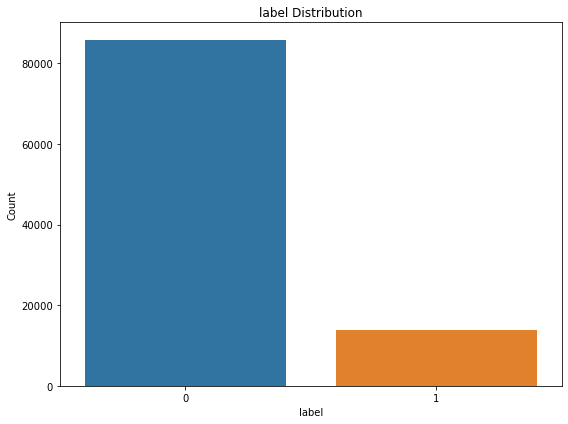

In [1005]:
# plot the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('label Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### data is imbalanced which leads in overfitting

####  resampling

In [1006]:
majority_class = df[df['label'] == 1]
minority_class = df[df['label'] == 0]

minority_upsampled = resample(minority_class, replace=True, n_samples=70000)
majority_resampled = resample(majority_class, replace=True, n_samples=70000)


# Concatenate the upsampled minority class with the majority class
balanced_df = pd.concat([majority_resampled, minority_upsampled])

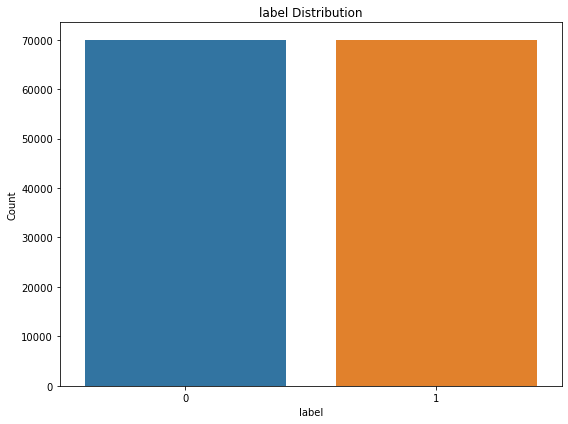

In [1007]:
# plot the label distribution after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=balanced_df)
plt.title('label Distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [1008]:
X= balanced_df.drop('label', axis=1)

In [1009]:
Y= balanced_df['label']

In [1010]:
# pca = PCA(n_components=3)
# X = pca.fit_transform(X)

In [1011]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [1012]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(X_train))
x_test = pd.DataFrame(scaler.transform(X_test))

#### train again after resmapling

In [944]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(Y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(Y_test, y_pred)}')
    print("Recall Score : ",recall_score(Y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(Y_test, y_pred,  pos_label='positive',average='micro'))     
    
    
    print(f"Testing F-1:", f1_score(Y_test, y_pred, pos_label='positive', average='micro' )        )
    
    
    
    print(f"Testing F-Beta:", fbeta_score(Y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------


C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[

Training Accuracy: 0.6490446428571428
Testing Accuracy: 0.6492857142857142
Testing Confusion Matrix: 
[[8956 5124]
 [4696 9224]]
Recall Score :  0.6492857142857142
Precision Score :  0.6492857142857142
Testing F-1: 0.6492857142857142
Testing F-Beta: 0.6492857142857142
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9990982142857143
Testing Accuracy: 0.9510357142857143
Testing Confusion Matrix: 
[[12834  1246]
 [  125 13795]]
Recall Score :  0.9510357142857143
Precision Score :  0.9510357142857143
Testing F-1: 0.9510357142857143
Testing F-Beta: 0.9510357142857144
------------------------------
Training Model RF 
--------------


C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (go

Training Accuracy: 0.9990982142857143
Testing Accuracy: 0.9486428571428571
Testing Confusion Matrix: 
[[12765  1315]
 [  123 13797]]
Recall Score :  0.9486428571428571
Precision Score :  0.9486428571428571
Testing F-1: 0.9486428571428571
Testing F-Beta: 0.9486428571428571
------------------------------
Training Model XGB 
--------------


C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (go

Training Accuracy: 0.8469196428571428
Testing Accuracy: 0.8328214285714286
Testing Confusion Matrix: 
[[10033  4047]
 [  634 13286]]
Recall Score :  0.8328214285714286
Precision Score :  0.8328214285714286
Testing F-1: 0.8328214285714286
Testing F-Beta: 0.8328214285714286
------------------------------
Training Model Naive Bayes 
--------------


C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (go

Training Accuracy: 0.7717321428571429
Testing Accuracy: 0.7733214285714286
Testing Confusion Matrix: 
[[10034  4046]
 [ 2301 11619]]
Recall Score :  0.7733214285714286
Precision Score :  0.7733214285714286
Testing F-1: 0.7733214285714286
Testing F-Beta: 0.7733214285714286
------------------------------


C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kamunna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (go

#### training result after resampling gives bad result except for decision tree and random forrest
### decesion tree gives 95 % on test data 

###  Recall Score :  0.9510357142857143
###  Precision Score :  0.9510357142857143
###  Testing F-1: 0.9510357142857143
###  Testing F-Beta: 0.9510357142857144